In [61]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [62]:
plt.rcParams["figure.figsize"] = (16, 8)
rnd = random.random

In [63]:
def plot_data(data, line=None, color_data='orange', color_line='blue'):
  data_length = len(data)

  x = [data[i][0] for i in range(data_length)]
  y = [data[i][1] for i in range(data_length)]

  plt.scatter(x, y, color=color_data)
  if line:
    plt.plot(line[0], line[1], color=color_line)
  plt.show()
  return

In [64]:
def generate_data(n):
  slope = rnd() * 20 - 10
  intercept = rnd() * 20 - 10

  get_random_delta = lambda: rnd() - 0.5

  x = np.array([i + get_random_delta() for i in range(n)])
  x = x / max(x)

  y = np.array([slope * i + intercept + get_random_delta() for i in x])
  y = y / max(y)

  return [(x[i], y[i]) for i in range(n)]

In [65]:
def loss_function(k, b, data):
  total_error = 0
  data_length = len(data)

  for i in range(data_length):
    x = data[i][0]
    y = data[i][1]

    total_error += (y - k * x - b) ** 2
  
  total_error /= data_length
  return total_error

In [66]:
def gradient_descent(k_prev, b_prev, data, lr):
  k_grad = 0
  b_grad = 0

  data_length = len(data)

  for i in range(data_length):
    x = data[i][0]
    y = data[i][1]

    k_grad += -(2 / data_length) * x * (y - (k_prev * x + b_prev))
    b_grad += -(2 / data_length) * (y - (k_prev * x + b_prev))
  
  k_current = k_prev - lr * k_grad
  b_current = b_prev - lr * b_grad

  return k_current, b_current

In [67]:
def train(data, epochs, learning_rate):
  k = 0
  b = 0

  losses = []

  for i in range(epochs):
    k, b = gradient_descent(k, b, data, learning_rate)
    
    loss = loss_function(k, b, data)
    losses.append(loss)

    if (i + 1) % 20 == 0:
      print(f'Epoch №{i + 1} done\nLoss: {round(loss, 4)}\n')

  return k, b, losses

-----------

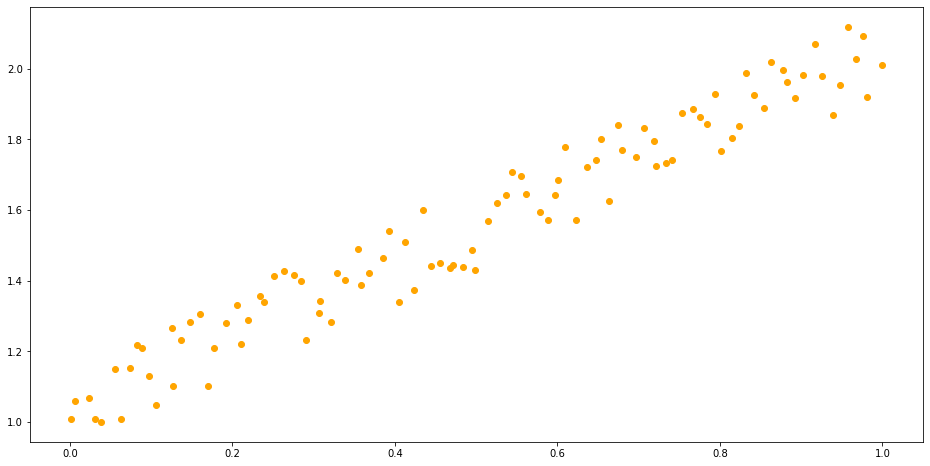

In [171]:
data = generate_data(100)
plot_data(data)

Epoch №20 done
Loss: 0.0112

Epoch №40 done
Loss: 0.0086

Epoch №60 done
Loss: 0.0071

Epoch №80 done
Loss: 0.0062

Epoch №100 done
Loss: 0.0057

Epoch №120 done
Loss: 0.0054

Epoch №140 done
Loss: 0.0052

Epoch №160 done
Loss: 0.0051

Epoch №180 done
Loss: 0.0051

Epoch №200 done
Loss: 0.005

Epoch №220 done
Loss: 0.005

Epoch №240 done
Loss: 0.005

Epoch №260 done
Loss: 0.005

Epoch №280 done
Loss: 0.005

Epoch №300 done
Loss: 0.005

-----------

Loss change


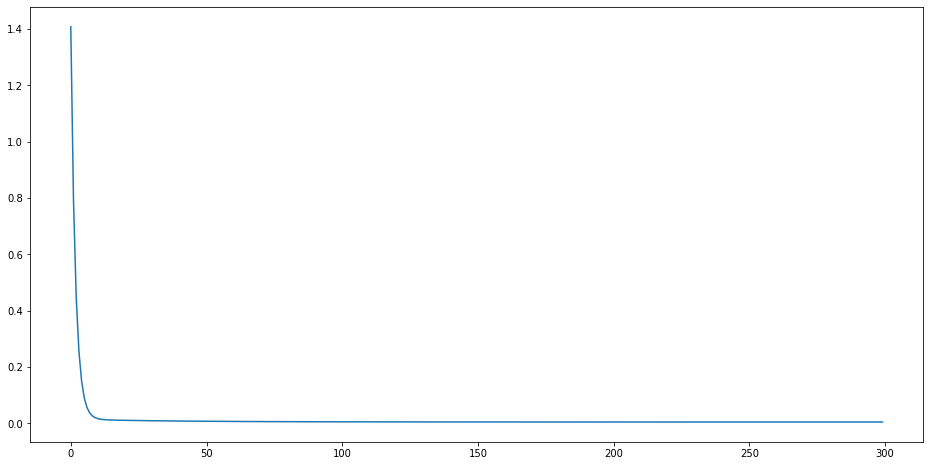

In [172]:
slope, intercept, losses = train(data, 300, 0.1)

print('-----------\n\nLoss change')
plt.plot(losses)
plt.show()

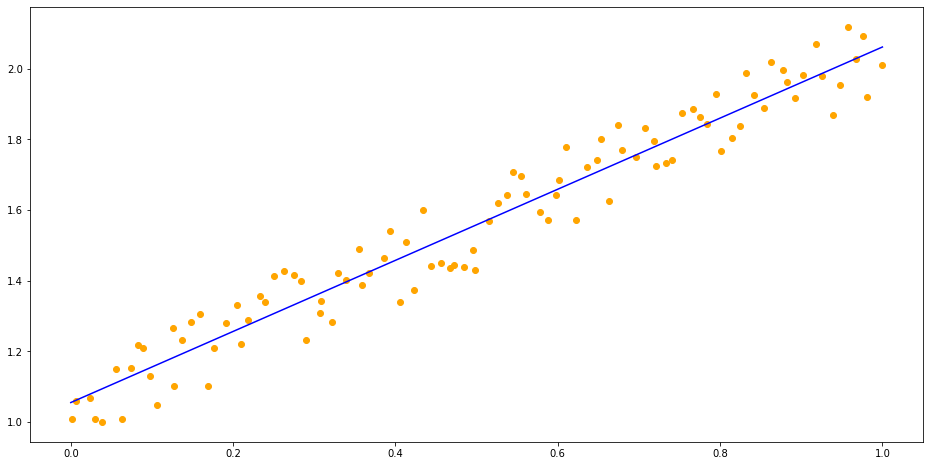

In [173]:
line_x = [0, 1]
line_y = [slope * x + intercept for x in line_x]

plot_data(data, line=(line_x, line_y))